In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

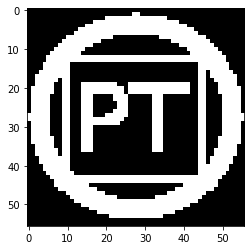

In [57]:
watermark = cv2.imread('template.png')
watermark = cv2.cvtColor(watermark, cv2.COLOR_BGR2RGB)
plt.imshow(watermark);

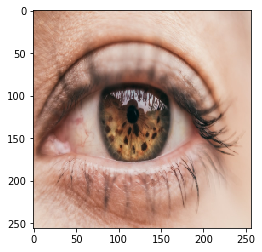

In [58]:
img = cv2.imread('data/AoLkcXdQoNs.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (256, 256))
plt.imshow(img);

In [59]:
mask = np.zeros_like(img)
n, m, k = watermark.shape
x_offset, y_offset = 100, 100
mask[-(n + x_offset):-x_offset,-(m + y_offset):-y_offset,-k:] = watermark

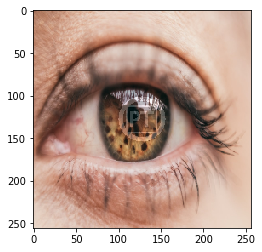

In [60]:
plt.imshow(cv2.addWeighted(img, 1, mask, .2, .3))

In [61]:
import os

In [69]:
for i, file in enumerate(os.listdir('data')):
    img = cv2.imread(f'data/{file}')
    try:
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (256, 256))
    except cv2.error:
        print("skipping io error")
        continue
    # First 70 pictures are watermarked, remaining 70 are clean
    if i < 70:
        mask = np.zeros_like(img)
        n, m, k = watermark.shape
        x_offset, y_offset = 100, 100
        mask[-(n + x_offset):-x_offset,-(m + y_offset):-y_offset,-k:] = watermark
        img = cv2.addWeighted(img, 1, mask, .2, .3)
        cv2.imwrite(f'labeled/watermark_{file}', img)
    else:
        cv2.imwrite(f'labeled/clean_{file}',  img)

bad
